In [1]:
%matplotlib inline
import os
import sys
sys.path.append("../src/")

import numpy as np
import cv2
import matplotlib.pyplot as plt

from image_utils import read_image, read_profile
from image_utils import reduce_mask, expand_mask, reverse_mask
from image_utils import extract_border, merge_images
from blur import avgBlur, normBlur, medianBlur, bltBlur

In [2]:
test_dir = "../test/"

input_dir = os.path.join(test_dir,"input/")

image_dir = os.path.join(input_dir, "image/")
profile_dir = os.path.join(input_dir, "profile/")

In [3]:
# image 디렉토리의 파일명과 profile 디렉토리의 파일명은 동일함. 
# 이름을 기준으로 mapping되어 있음
filenames = os.listdir(image_dir) 
filename = filenames[-1]

imagepath = os.path.join(image_dir,filename)
image = read_image(imagepath)

profilepath = os.path.join(profile_dir,filename)
profile = read_profile(profilepath)

## Blur 연산

### 1. avgBlur

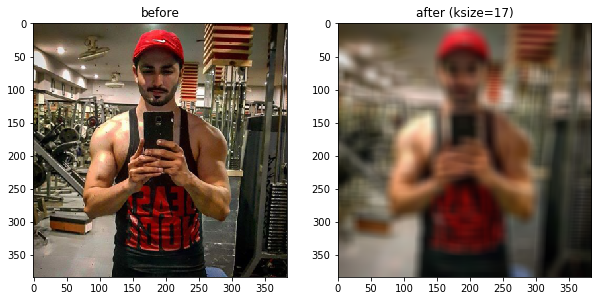

In [4]:
before = image
ksize = 17
after = avgBlur(image,ksize)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title('before')
ax.imshow(before)
ax = fig.add_subplot(122)
ax.set_title('after (ksize={})'.format(ksize))
ax.imshow(after)

### 2. normBlur

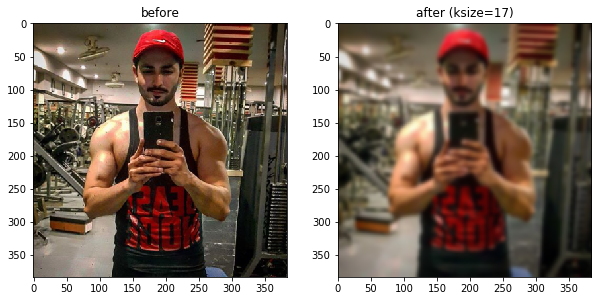

In [5]:
before = image
ksize = 17
after = normBlur(image,ksize)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title('before')
ax.imshow(before)
ax = fig.add_subplot(122)
ax.set_title('after (ksize={})'.format(ksize))
ax.imshow(after)

### 3. medianBlur

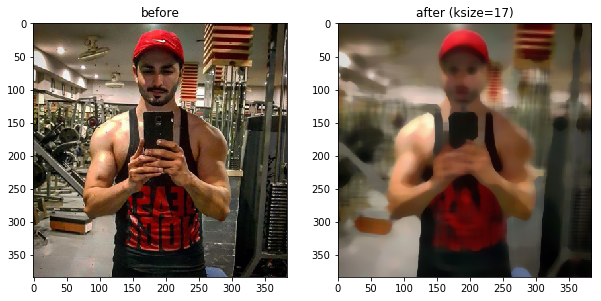

In [6]:
before = image
ksize = 17
after = medianBlur(image,ksize)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title('before')
ax.imshow(before)
ax = fig.add_subplot(122)
ax.set_title('after (ksize={})'.format(ksize))
ax.imshow(after)

### 4. bltBlur

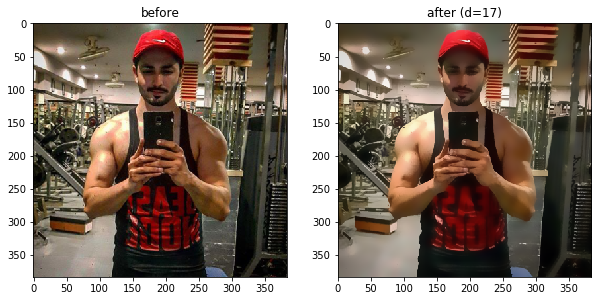

In [7]:
before = image
d = 17
after = bltBlur(image,d)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title('before')
ax.imshow(before)
ax = fig.add_subplot(122)
ax.set_title('after (d={})'.format(d))
ax.imshow(after)

## Blur 연산  + Mask

> Blur를 Mask와 함께 이용하게 되면, 배경에게만 적용하는 형태가 가능해짐

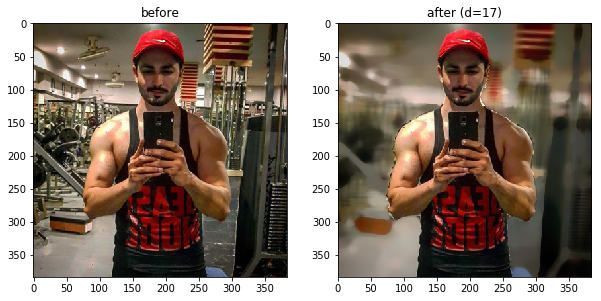

In [8]:
before = image
mask = reverse_mask(profile)
d = 17
blurred = medianBlur(image,d)
after1 = merge_images(blurred,before,mask)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(121)
ax.set_title('before')
ax.imshow(before)
ax = fig.add_subplot(122)
ax.set_title('after (d={})'.format(d))
ax.imshow(after1)

```
이 경우 인물과 배경 부분사이의 경계부분이 지나치게 명료해서, 작위적인 느낌이 너무 강함
이 경우를 위해, blur가 인물 부분 중 경계 일부분까지 포함하는 형태로 가면 좀 더 나음
reduce_mask는 인물 부분을 좀 더 줄임으로서, 인물의 경계 선도 Blurry하게 만들어주어서,

filter효과가 보다 부드럽게 만들어줌
```

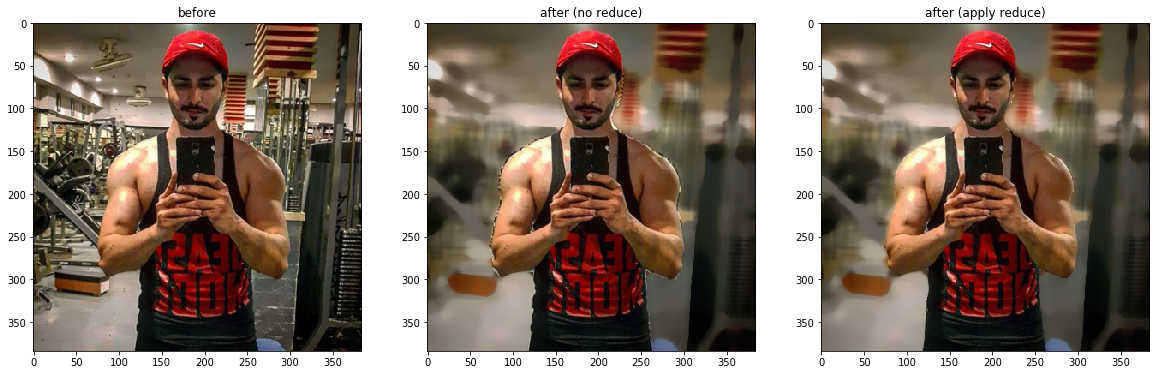

In [9]:
before = image
r_mask = reduce_mask(profile, width=2)
r_mask = reverse_mask(r_mask) # reduce 적용 마스크

d = 17
blurred = medianBlur(image,d)
after2 = merge_images(blurred,before,r_mask)

fig = plt.figure(figsize=(20,15))

ax = fig.add_subplot(131)
ax.set_title('before')
ax.imshow(before)

ax = fig.add_subplot(132)
ax.set_title('after (no reduce)')
ax.imshow(after1)

ax = fig.add_subplot(133)
ax.set_title('after (apply reduce)')
ax.imshow(after2)